In [19]:
import torch

from utils import evaluate, get_daparam, get_dataset, get_network

class EvaluateArgs():
    device = "cuda:0"
    lr_net = 0.01
    epoch_eval_train = 20
    batch_train = 256

    dsa = False
    dc_aug_param = {}

class DataDAMArgs():
    dataset = 'MNIST'
    model = 'ConvNet'
    ipc = 10
    eval_mode = 'SS'
    num_exp = 1
    num_eval = 100
    epoch_eval_train = 50
    Iteration = 10
    lr_img = 0.1
    lr_net = 0.01
    batch_real = 256
    batch_train = 256
    init = 'real'
    dsa_strategy = 'color_crop_cutout_flip_scale_rotate'
    data_path = 'MNIST/'
    zca = False
    save_path = 'MNIST_syn/real/'
    task_balance = 0.01
    method = 'DataDAM'

# 2

In [ ]:
!pip install -e PAD/

In [ ]:
# Generate indices file
channel, im_size, num_classes, class_names, mean, std, dst_train, dst_test, testloader = get_dataset('MNIST', 'MNIST/')
indices = torch.randperm(len(dst_train))
indices_file_path = "./PAD/PAD/data_indices/{}.pt".format('MNIST')
torch.save(indices, indices_file_path)

In [ ]:
!python ./PAD/PAD/buffer/buffer_CL.py --dataset MNIST --data_path MNIST/ --buffer_path ./buffers_PAD/ --sort_method MNIST --num_experts 50

In [ ]:
!python ./PAD/PAD/distill/PAD_depth.py --cfg ./PAD/PAD/configs/MNIST/IPC10.yaml

C:\Users\colin\AppData\Local\Temp\ipykernel_2608\1631911069.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  images_50 = torch.load("./logged_files/MNIST/10/ConvNet/RANDO

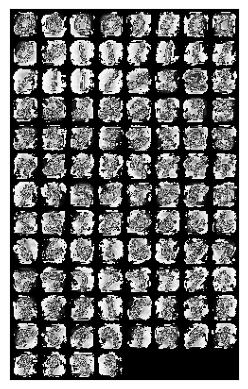

In [ ]:
# images after 50 iterations

import os
from torchvision.utils import make_grid

from utils import save

images_50 = torch.load("./logged_files_PAD/MNIST/10/ConvNet/RANDOM/Normal/images_50.pt")

grid = make_grid(images_50)
save(grid, './images_50.png')

C:\Users\colin\AppData\Local\Temp\ipykernel_2608\3932041682.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  images_100 = torch.load("./logged_files/MNIST/10/ConvNet/RAND

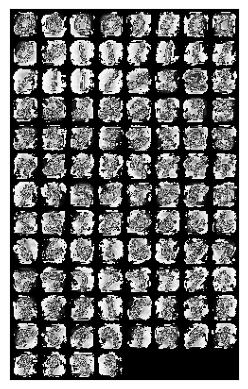

In [ ]:
# images after 50 iterations

import os
from torchvision.utils import make_grid

from utils import save

images_100 = torch.load("./logged_files_PAD/MNIST/10/ConvNet/RANDOM/Normal/images_100.pt")

grid = make_grid(images_100)
save(grid, './images_100.png')

In [ ]:
import os
from torchvision.utils import make_grid

from utils import save

images_best = torch.load("./logged_files_PAD/MNIST/10/ConvNet/RANDOM/Normal/images_best.pt")
labels_best = torch.load("./logged_files_PAD/MNIST/10/ConvNet/RANDOM/Normal/labels_best.pt")
labels_best = torch.max(labels_best, dim=1).indices

evaluate_args = EvaluateArgs()
evaluate_args.dc_aug_param = get_daparam('MNIST', 'ConvNet', 'ConvNet', 10)

channel, im_size, num_classes, class_names, mean, std, dst_train, dst_test, testloader = get_dataset('MNIST', 'MNIST/')
ConvNet_3 = get_network('ConvNet', channel, num_classes, im_size)

_, acc_train, acc_test = evaluate(0, ConvNet_3, images_best, labels_best, testloader, args = evaluate_args)

C:\Users\colin\AppData\Local\Temp\ipykernel_2608\2819563086.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  images_best = torch.load("./logged_files/MNIST/10/ConvNet/RAN

[2024-11-04 17:18:38] Evaluate_00: epoch = 0020 train time = 0 s train loss = 1.306587 train acc = 0.5900, test acc = 0.5613


# 3

In [1]:
!pip install -e DATM/

Obtaining file:///F:/Work/ECE1512/ProjectA/DATM
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py develop for DATM



[notice] A new release of pip is available: 23.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!python ./DATM/DATM/buffer/buffer_FTD.py --dataset MNIST --data_path MNIST/ --buffer_path ./buffers_DATM/ --num_experts 1 --save_interval 1

In [ ]:
!python ./DATM/DATM/distill/DATM_tesla.py --cfg ./DATM/DATM/configs/MNIST/IPC400.yaml

In [ ]:
!python ./DATM/DATM/distill/DATM_tesla.py --cfg ./DATM/DATM/configs/MNIST/IPC600.yaml

In [ ]:
!python ./DATM/DATM/distill/DATM_tesla.py --cfg ./DATM/DATM/configs/MNIST/IPC800.yaml

In [ ]:
!python ./DATM/DATM/distill/DATM_tesla.py --cfg ./DATM/DATM/configs/MNIST/IPC1000.yaml